In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')
from mdout_analyzer import mdout

In [2]:
def extract_energy_components(mdout_file):
    """
    Extract energy component values from mdout file.
    """
    my_mdout = mdout.AmberMdout(mdout_file)
    keys = list(my_mdout.data.keys())
    energy = {}
    for key in keys:
        energy[key] = my_mdout.data[key]
    df = pd.DataFrame.from_dict(energy)
    
    return df

In [3]:
prod_mdout = './prod-2.out'
df = extract_energy_components(mdout_file=prod_mdout)
df

,NSTEP,TIME(PS),TEMP(K),PRESS,Etot,EKtot,EPtot,BOND,ANGLE,DIHED,1-4 NB,1-4 EEL,VDWAALS,EELEC,EHBOND,RESTRAINT,EKCMT,VIRIAL,VOLUME,Density
0,10000.0,10220.000,310.63,0.0,-72017.8935,17373.8887,-89391.7822,448.2765,1158.8986,1764.5721,509.2293,5578.6881,10957.2818,-109808.7285,0.0,0.0,0.0,0.0,278205.4651,1.0108
1,20000.0,10240.000,310.39,0.0,-71657.1124,17360.4004,-89017.5128,409.8347,1143.0828,1747.5114,523.5692,5589.8488,10901.2916,-109332.6512,0.0,0.0,0.0,0.0,278043.6432,1.0114
2,30000.0,10260.000,306.15,0.0,-72190.0042,17122.9062,-89312.9104,408.0781,1151.1193,1783.8466,530.0937,5576.4838,10778.2239,-109540.7559,0.0,0.0,0.0,0.0,278380.8993,1.0102
3,40000.0,10280.000,312.18,0.0,-71925.7677,17460.6348,-89386.4025,458.9654,1215.3174,1759.8499,492.9626,5561.9684,10693.5301,-109568.9962,0.0,0.0,0.0,0.0,278682.1632,1.0091
4,50000.0,10300.000,309.07,0.0,-71874.2852,17286.2051,-89160.4903,443.0914,1173.1663,1767.6517,503.2030,5562.1111,10799.2888,-109409.0025,0.0,0.0,0.0,0.0,279391.3011,1.0065
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,499960000.0,1010119.992,311.52,0.0,-71647.4716,17423.1953,-89070.6669,456.2048,1254.5777,1740.0105,493.1580,5555.8175,10584.9571,-109155.3924,0.0,0.0,0.0,0.0,278973.4728,1.0081
49996,499970000.0,1010139.992,307.67,0.0,-72191.5874,17208.0840,-89399.6714,422.1350,1202.6094,1753.9409,515.0188,5588.9769,10733.6540,-109616.0064,0.0,0.0,0.0,0.0,278067.5402,1.0113
49997,499980000.0,1010159.992,307.09,0.0,-72025.5177,17175.4316,-89200.9493,423.3257,1165.5593,1738.2314,513.3742,5596.8523,10855.4575,-109493.7497,0.0,0.0,0.0,0.0,278748.2292,1.0089
49998,499990000.0,1010179.992,313.60,0.0,-71427.8285,17539.6250,-88967.4535,434.9492,1199.7039,1725.6153,530.3777,5570.0462,10599.5411,-109027.6869,0.0,0.0,0.0,0.0,278490.7327,1.0098


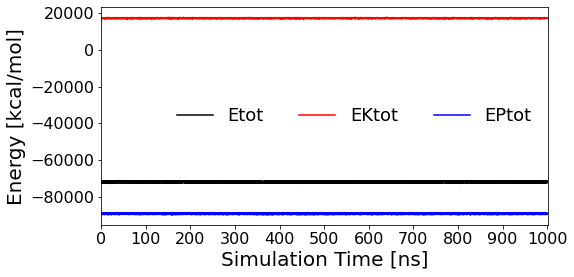

In [4]:
time = [step*0.002/1000 for step in df['NSTEP'].to_list()] # in ns
EPtot = df['EPtot'].to_list()
EKtot = df['EKtot'].to_list()
Etot = df['Etot'].to_list()
fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(111)
xmin = 0
xmax = 1001
ax.set_xlim([xmin, xmax])
plt.plot(time, Etot, color='black',  label='Etot') 
plt.plot(time, EKtot, color='red',  label='EKtot') 
plt.plot(time, EPtot, color='blue',  label='EPtot') 
plt.xlabel('Simulation Time [ns]', fontsize=20)
plt.ylabel(r'Energy [kcal/mol]', fontsize=20)
plt.xticks(np.arange(0, 1001, 100))
ax.tick_params(labelsize=16)
plt.legend(loc='best', fontsize=18, frameon=False, ncol=3)
plt.show()

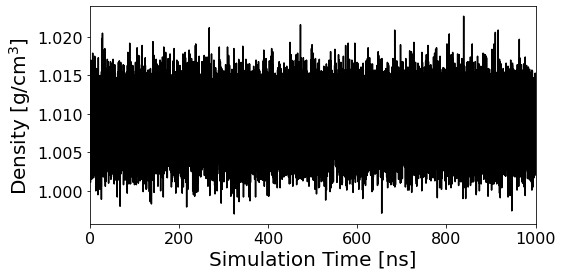

In [5]:
time = [step*0.002/1000 for step in df['NSTEP'].to_list()] # in ns
Density = df['Density'].to_list()
fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(111)
xmin = 0
xmax = 1001
ax.set_xlim([xmin, xmax])
plt.plot(time[::50], Density, color='black',  label='Density') 
plt.xlabel('Simulation Time [ns]', fontsize=20)
plt.ylabel(r'Density [g/cm$^3$]', fontsize=20)
plt.xticks(np.arange(0, 1001, 200))
ax.tick_params(labelsize=16)
# plt.legend(loc='best', fontsize=18, frameon=False, ncol=3)
plt.show()

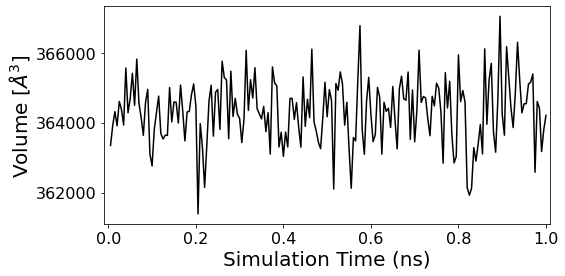

In [64]:
time = [step*0.002/1000 for step in df['NSTEP'].to_list()] # in ns
VOLUME = df['VOLUME'].to_list()
fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(111)
xmin = -0.01
xmax = 1.01
ax.set_xlim([xmin, xmax])
plt.plot(time, VOLUME, color='black',  label='Volume') 
plt.xlabel('Simulation Time (ns)', fontsize=20)
plt.ylabel(r'Volume [$\AA^3$]', fontsize=20)
plt.xticks(np.arange(0, 1.01, 0.2))
ax.tick_params(labelsize=16)
# plt.legend(loc='best', fontsize=18, frameon=False, ncol=3)
plt.show()

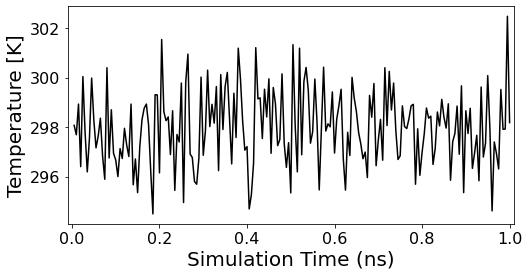

In [65]:
time = [step*0.002/1000 for step in df['NSTEP'].to_list()] # in ns
TEMP = df['TEMP(K)'].to_list()
fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(111)
xmin = -0.01
xmax = 1.01
ax.set_xlim([xmin, xmax])
plt.plot(time, TEMP, color='black',  label='Temperature') 
plt.xlabel('Simulation Time (ns)', fontsize=20)
plt.ylabel(r'Temperature [K]', fontsize=20)
plt.xticks(np.arange(0, 1.01, 0.2))
ax.tick_params(labelsize=16)
# plt.legend(loc='best', fontsize=18, frameon=False, ncol=3)
plt.show()

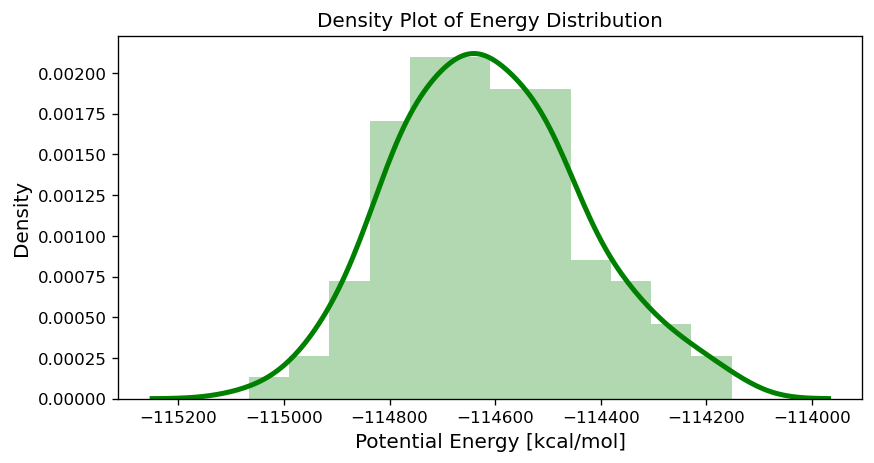

In [72]:
plt.figure(figsize=(8, 4), dpi=120)
sns.distplot(df.loc[df['PRESS']==0.0, "EPtot"], color="green", label="EPtot", hist_kws={'alpha':0.3}, kde_kws={'linewidth':3})
plt.title('Density Plot of Energy Distribution', fontsize=12)
# plt.legend()
plt.xlabel('Potential Energy [kcal/mol]', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.show()

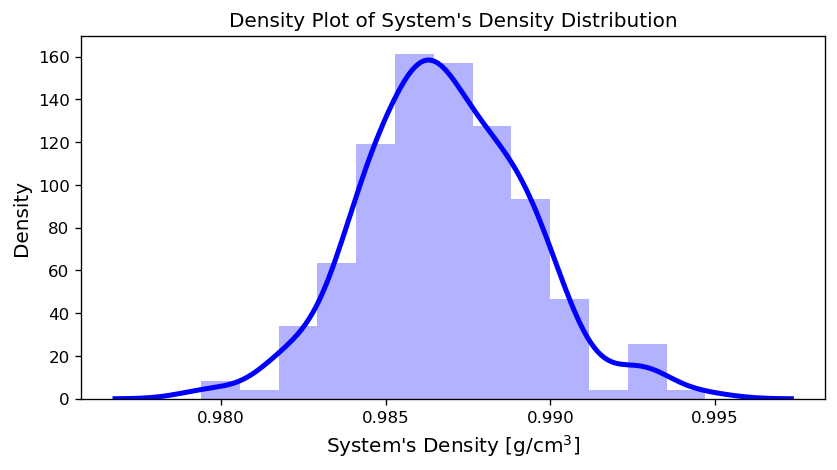

In [71]:
plt.figure(figsize=(8, 4), dpi=120)
sns.distplot(df.loc[df['PRESS']==0.0, "Density"], color="blue", label="Density", hist_kws={'alpha':0.3}, kde_kws={'linewidth':3})
plt.title("Density Plot of System's Density Distribution", fontsize=12)
# plt.legend()
plt.xlabel(r"System's Density [g/cm$^3$]", fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.show()

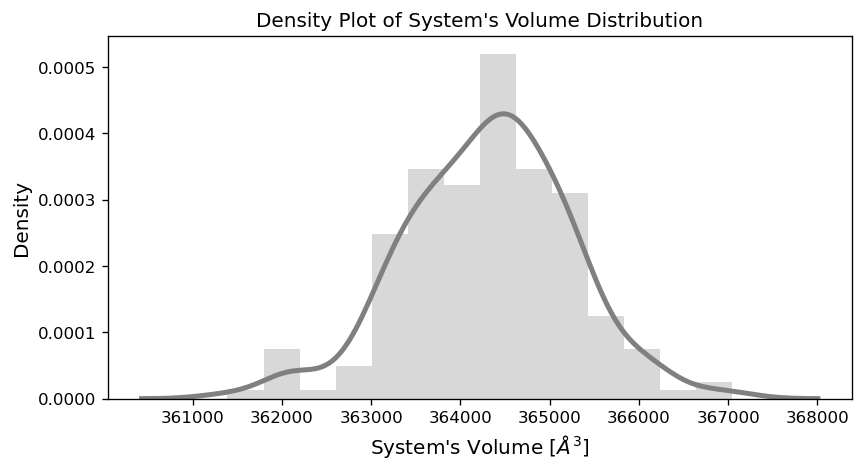

In [70]:
plt.figure(figsize=(8, 4), dpi=120)
sns.distplot(df.loc[df['PRESS']==0.0, "VOLUME"], color="grey", label="Volume", hist_kws={'alpha':0.3}, kde_kws={'linewidth':3})
plt.title("Density Plot of System's Volume Distribution", fontsize=12)
# plt.legend()
plt.xlabel(r"System's Volume [$\AA^3$]", fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.show()